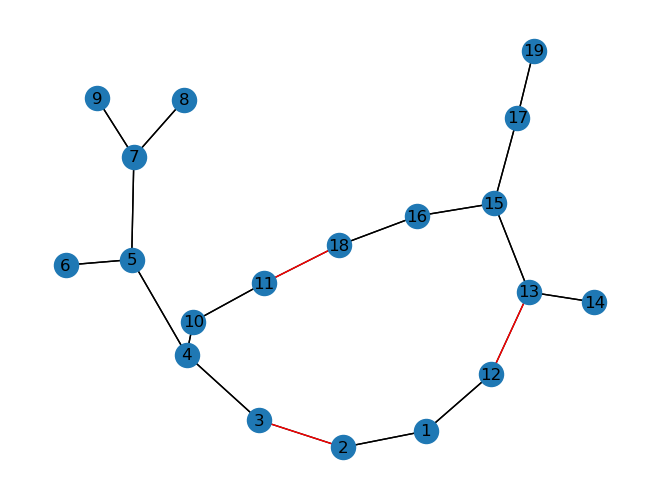

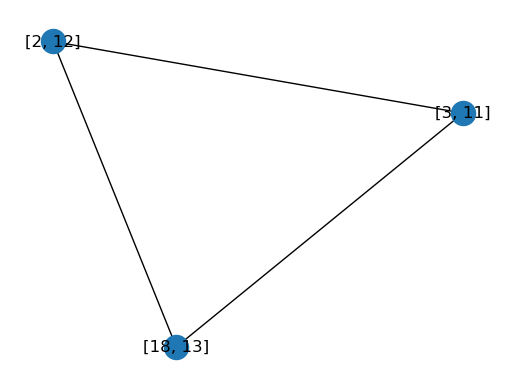

[[0 1 1]
 [1 0 0]
 [1 0 0]]


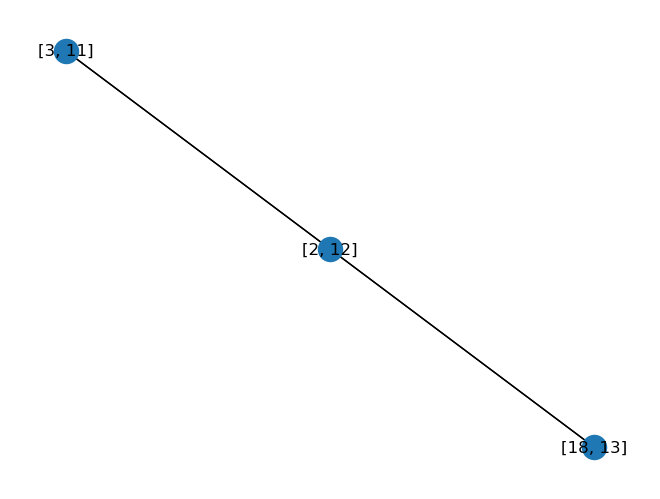

[[0 1 0]
 [1 0 1]
 [0 1 0]]


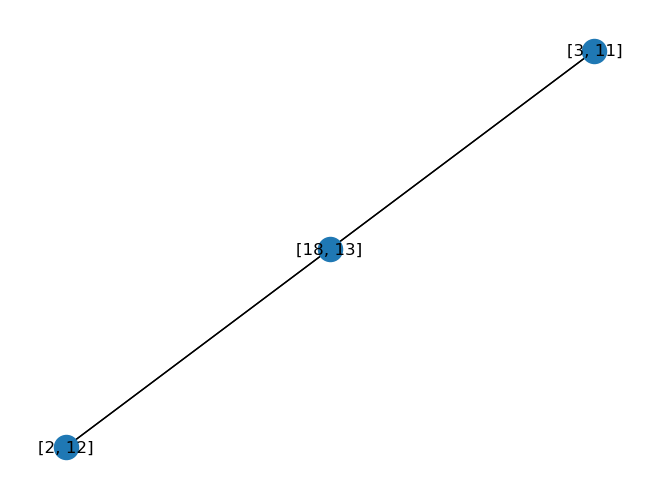

[[0 1 0]
 [1 0 1]
 [0 1 0]]


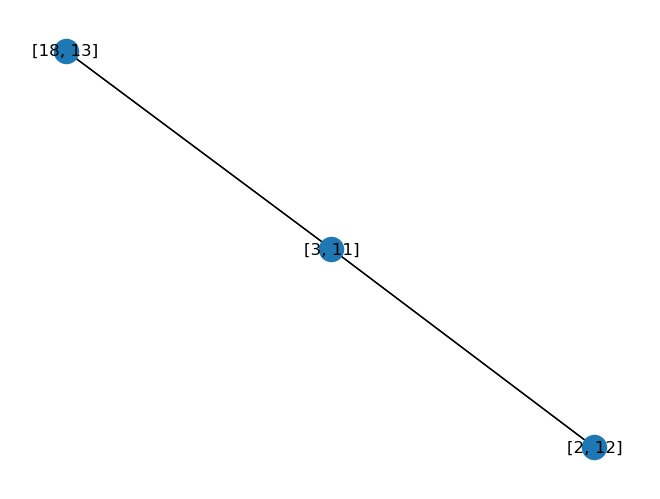

In [132]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()

edge_list=[(1,2,{'w':2}),(2,3,{'w':'s'}),(3,4,{'w':2}),(4,5,{'w':2}),(5,6,{'w':2}),(5,7,{'w':2}),(7,8,{'w':2}),(7,9,{'w':2}),(4,10,{'w':2}),(10,11,{'w':2}),(1,12,{'w':2}),(12,13,{'w':'s'}),(13,14,{'w':2}),(13,15,{'w':2}),(15,16,{'w':2}),(15,17,{'w':2}),(16,18,{'w':2}),(17,19,{'w':2}),(11,18,{'w':'s'})]
G.add_edges_from(edge_list)
#colors=['k']*len(edge_list)
#for i in range(len(edge_list)):
#    if edge_list[i][2]["w"]=='s':
#        print("i="),print(i)
#        print(edge_list[i][0],edge_list[i][1])
#        colors[i]='r'

edge_labels=nx.get_edge_attributes(G, "weight")
options = {
  #  "font_size": 36,
  #  "node_size": 3000,
    "node_color": "white",
#    "edgecolors": "black",
 #   "linewidths": 5,
 #   "width": 5,
}
#pos = nx.circular_layout(G)
pos=nx.spring_layout(G)
colors=['k']*len(edge_list)
switchL=[]
i=0
for n1, n2, d in G.edges(data=True):
    if d['w']=='s':
        colors[i]='r'
     #   print((n1,n2))
        switchL.append((n1,n2))
    i=i+1
#print(switchL[0][0])
switchL2=list(sum(switchL,()))

  #  print(((n1, n2), d['w']))
#to write labels to edges
#edge_labels = dict([((n1, n2), d['w']) for n1, n2, d in G.edges(data=True)])
#nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red', font_size=16, font_weight='bold')

#or e in G.edges:
#    print(e)

#edge_colors = ['r' if your_condition else 'color2' for e in G.edges]
nx.draw(G, pos,with_labels=True)
nx.draw_networkx_edges(G,edge_color=colors,pos=pos) #iiiiiiiiiiiiiiiiii
plt.axis("off")
plt.show() #iiiiiiiiiiiiiiiiiiiiiiiiii
Sedge_list=[]
SG=nx.Graph()
for n1, n2, d in G.edges(data=True):
    if d['w']!='s':
        Sedge_list.append((n1,n2))
    #i=i+1
#print(Sedge_list)
SG.add_edges_from(Sedge_list)
Spos=nx.spring_layout(SG)
#nx.draw(SG,Spos,with_labels=True)    #iiiiiiiiiiiiiiiiiiiiiiiiii
#nx.draw_networkx_edges(SG,pos=Spos)  #iiiiiiiiiiiiiiiiiiiiiiiiii

plt.axis("off")
#plt.show()   #iiiiiiiiiiiiiiiiiiiiiiiiii

#S=[SG.subgraph(c).copy() for c in nx.connected_components(SG)]
cc=list(nx.connected_components(SG))
def convert(s):
    return list(map(lambda x: x, s))
ccl=[]
for x in range(len(cc)):
    ccl.append(convert(cc[x]))
#for x in range(len(ccl)):
#    print(ccl[x])

superN=[]
for i in range(len(cc)):
    superN.append([])
    for a in switchL2:
        for b in ccl[i]:
            if a==b:
                superN[i].append(a)
#print("superN",superN)
superEdge_list=[]
#print("switchL",switchL)

superG=nx.Graph()
for i in range(len(superN)):
    superG.add_node(str(superN[i]))

#for i in range(len(superN)):
#    superG.add_node(superN[i])
L=list(superG.nodes)
#print(list(superG.nodes))
#print(type(switchL[0]))
#print("L[0]",type(L[0]),L[0])

superEdge=[]
for f in range(len(switchL)):
    
    superEdge.append([])
    j1=0
    for j4 in range(len(superN)):
        if switchL[f][j1]==superN[j4][0] or switchL[f][j1]==superN[j4][1]:
            superEdge[f].append(superN[j4])
            j1=1
            j4=len(superN)-1

#print("superEdge",superEdge)
for iE in range(len(superEdge)):
    superG.add_edge(str(superEdge[iE][0]),str(superEdge[iE][1]))

superPos=nx.spring_layout(superG)
nx.draw(superG,superPos,with_labels=True)
#nx.draw_networkx_edges(superG,pos=superPos) #iiiiiiiiiiiiiiiiii
plt.axis("off")
plt.show()


for z in nx.SpanningTreeIterator(superG):
    sp_tree=nx.Graph()
    sp_tree.add_edges_from(z.edges())
    sp_tree_pos=nx.spring_layout(sp_tree)
    nx.draw(sp_tree,sp_tree_pos,with_labels=True)
    nx.draw_networkx_edges(sp_tree,pos=sp_tree_pos)
    print(nx.adjacency_matrix(sp_tree).todense())
    plt.axis("off")
    plt.show()
